In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
import warnings
warnings.filterwarnings('ignore')

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

In [5]:
df = pd.read_csv(url, sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [7]:
df.shape

(1599, 12)

In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<Axes: >

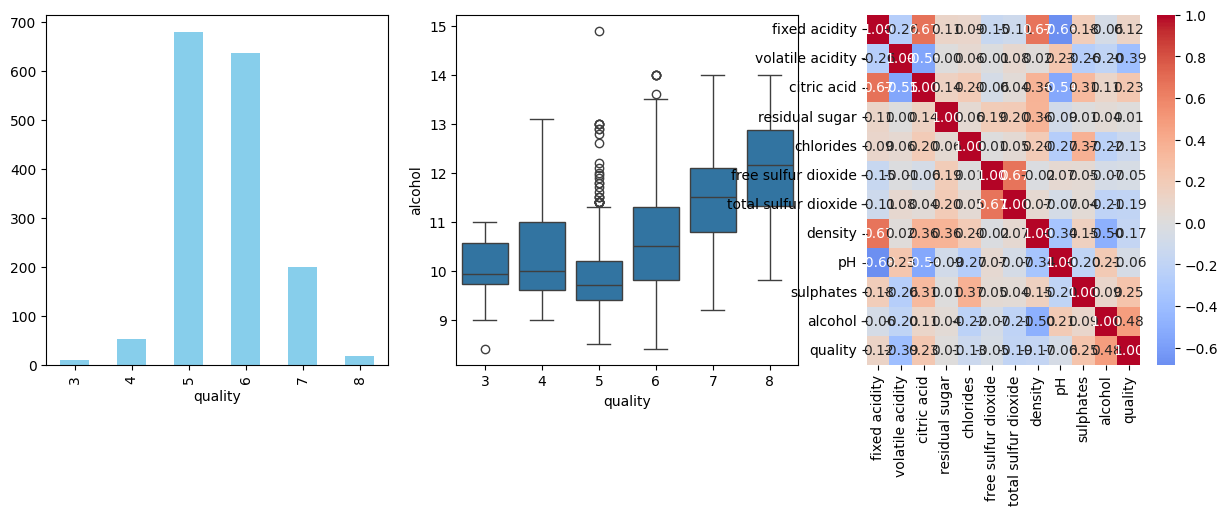

In [15]:
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
df['quality'].value_counts().sort_index().plot(kind='bar', color = 'skyblue')
#Alcohol vs quality 
plt.subplot(2,3,2)
sns.boxplot(data= df, x='quality', y = 'alcohol')

plt.subplot(2,3,3)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', center = 0, fmt = '.2f')

<Axes: >

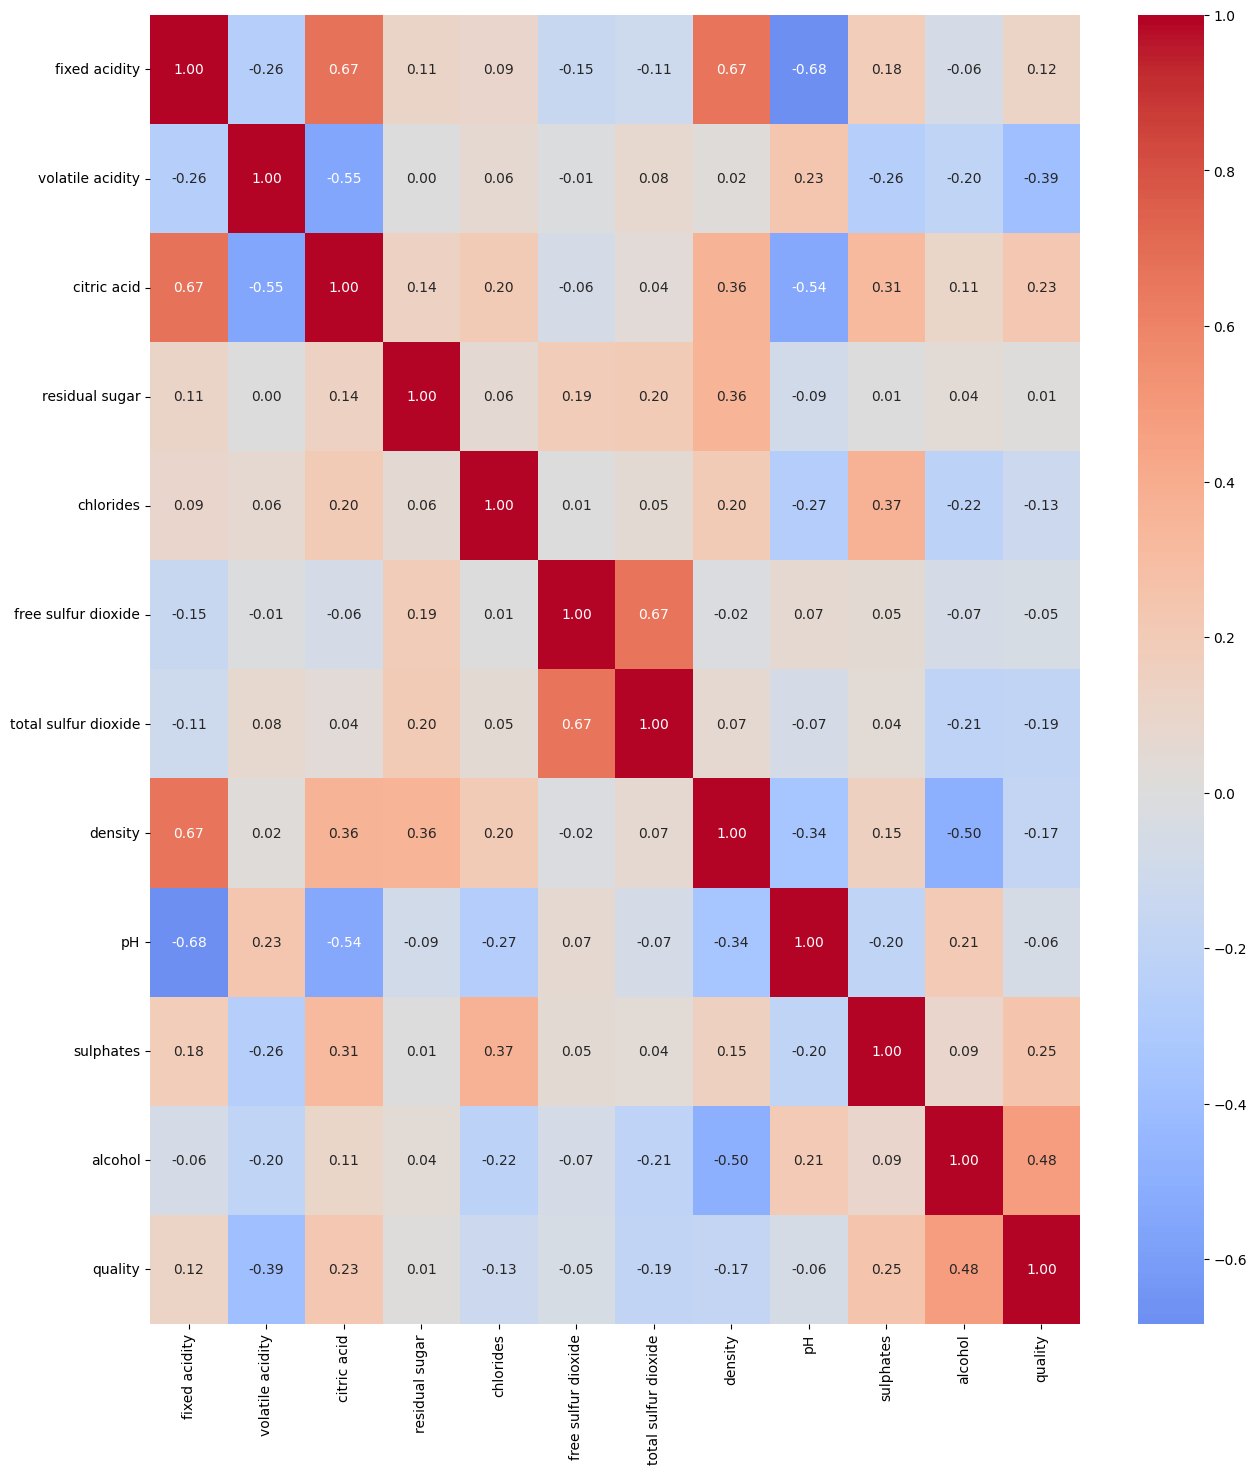

In [16]:
# correlation heatmap 
plt.figure(figsize = (15,17))

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', center = 0, fmt = '.2f')

Text(0.5, 1.0, 'ph distribution')

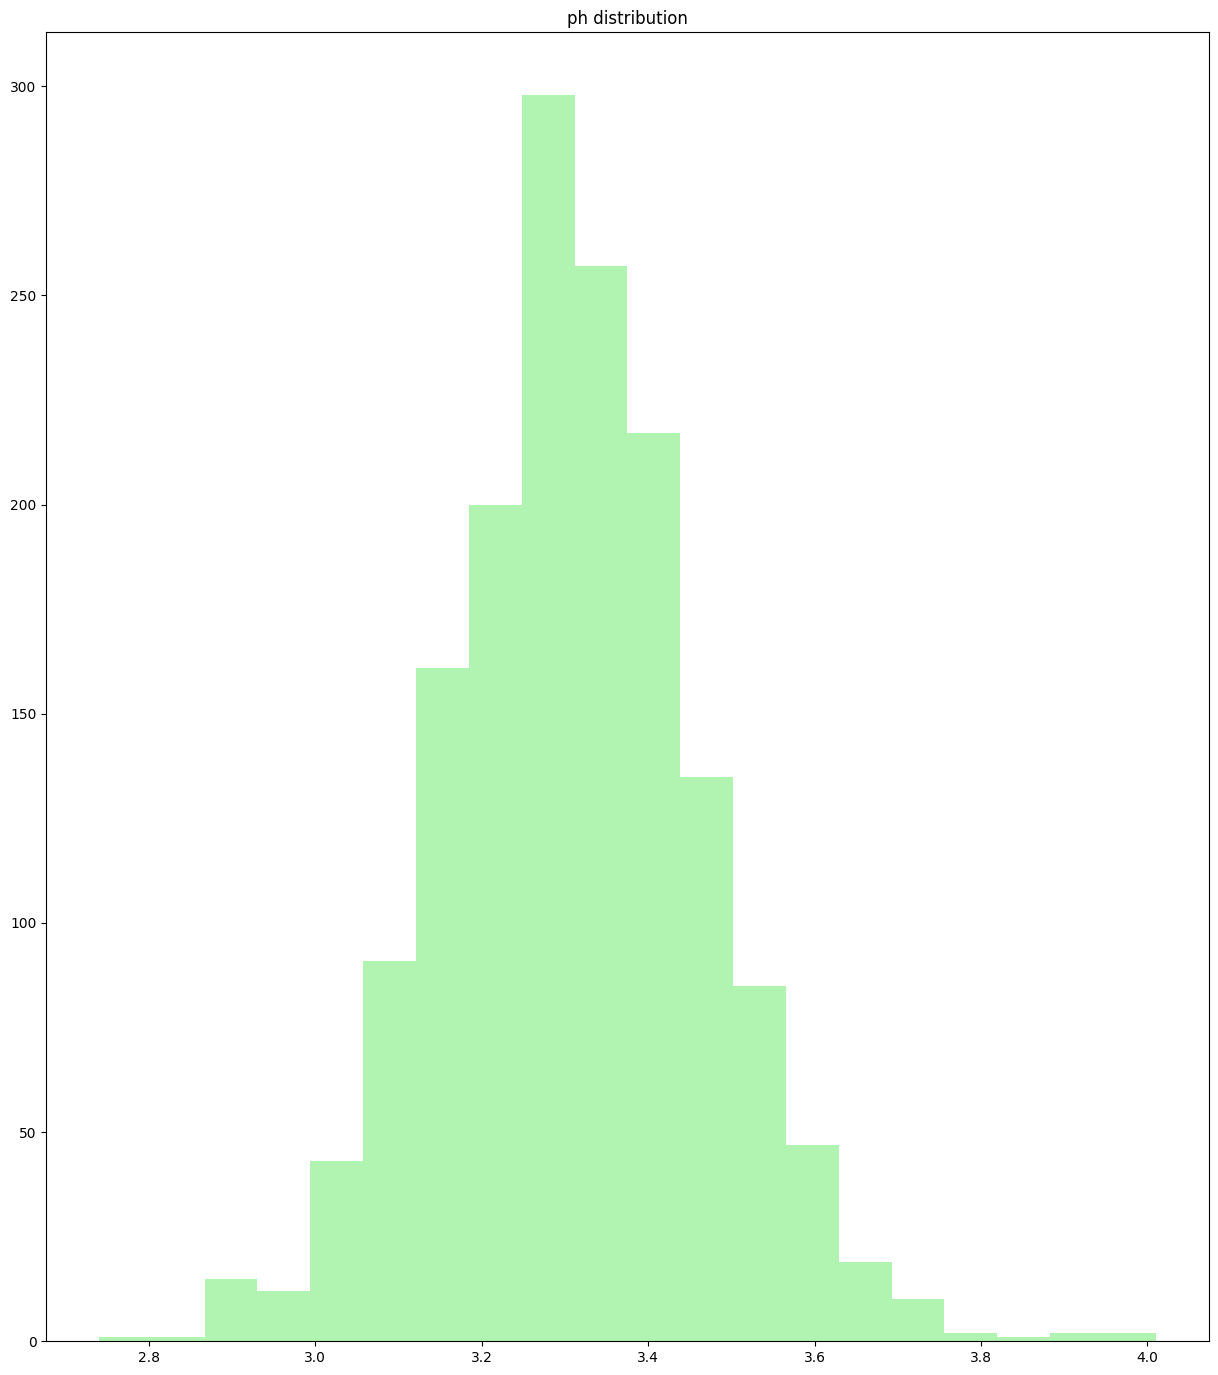

In [18]:
#ph distribution 
plt.figure(figsize = (15,17))
plt.hist(df['pH'], bins = 20, color = 'lightgreen', alpha = 0.7)
plt.title('ph distribution')

In [20]:
# Data preprocessing
#convert into binary  classification Good => vs Bad < 7
df['wine_quality']= (df['quality'] >= 7).astype(int)
df['wine_quality'].value_counts()

wine_quality
0    1382
1     217
Name: count, dtype: int64

In [21]:
print(f"Good wines (quality >= 7): {df['wine_quality'].sum()}")

Good wines (quality >= 7): 217


In [22]:
print(f"Bad wines (quality < 7): {len(df) - df['wine_quality'].sum()}")

Bad wines (quality < 7): 1382


In [24]:
#Separate features (X) from target (y)
X = df.drop(['quality', 'wine_quality'], axis = 1)
y = df['wine_quality']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()

In [27]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
input_shape = (X_train_scaled.shape[1])
input_shape

11

In [33]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(input_shape,)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid') 
])

In [34]:
model.compile(optimizer = optimizers.Adam(learning_rate=0.01),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,241 (40.00 KB)

 Non-trainable params: 384 (1.50 KB)

In [36]:
callback_list = [callbacks.EarlyStopping(monitor='val_accuracy', patience = 10, restore_best_weights = True), 
                callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience = 3, min_lr = 0.01)]


In [39]:
history = model.fit(X_train_scaled, y_train, 
                   validation_split = 0.2, 
                   epochs = 10, 
                   batch_size = 32, 
                   callbacks = callback_list, 
                   verbose = 1)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7439 - loss: 0.5586 - val_accuracy: 0.8828 - val_loss: 0.2773 - learning_rate: 0.0100
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8615 - loss: 0.3631 - val_accuracy: 0.8828 - val_loss: 0.2482 - learning_rate: 0.0100
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8767 - loss: 0.2930 - val_accuracy: 0.8867 - val_loss: 0.2520 - learning_rate: 0.0100
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8676 - loss: 0.2948 - val_accuracy: 0.9023 - val_loss: 0.2323 - learning_rate: 0.0100
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8666 - loss: 0.2891 - val_accuracy: 0.9023 - val_loss: 0.2229 - learning_rate: 0.0100
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8807 - loss: 0.2717 - val_accuracy: 0.8906 - val_loss: 0.2347 - learning_rate: 0.0100
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8872 - loss: 0.2795 - val_accuracy:

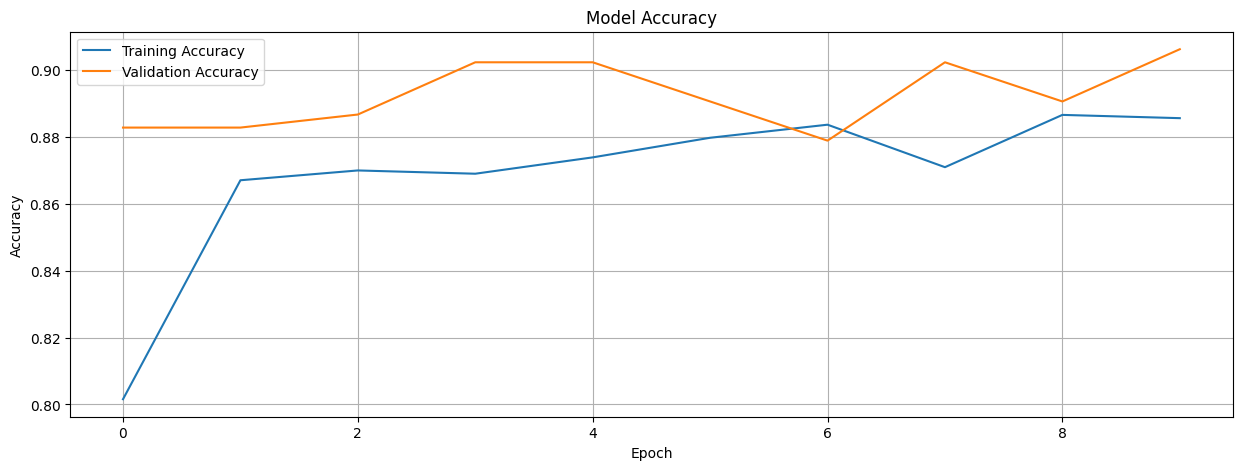

In [40]:
plt.figure(figsize=(15, 5))

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.legend(); plt.grid(True)